# CLuestering the Neighborhoods based on their category venues

## Applying K-Means algorithm

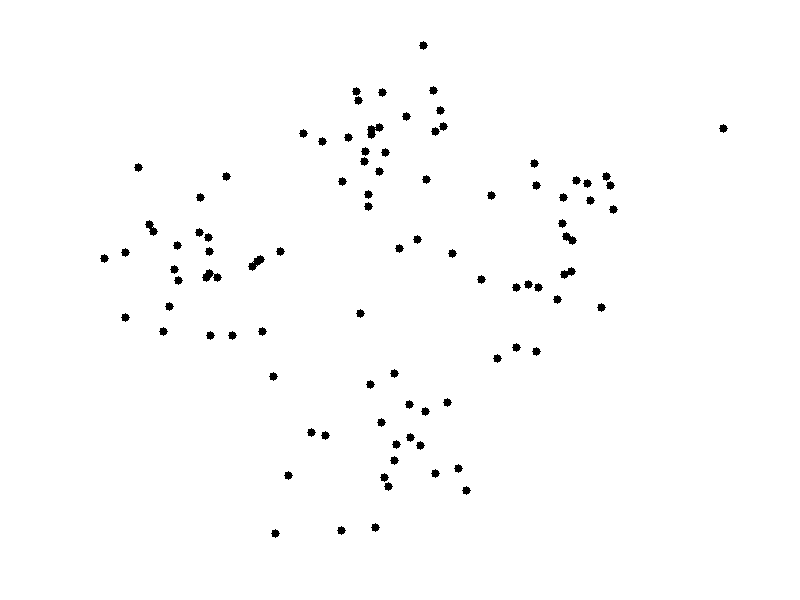

#### Importing the libraries

In [1]:
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Reading the data

In [2]:
df = pd.read_csv('cluster.csv')
dfc = pd.read_csv('coordinates.csv').sort_values(by = 'Neighborhood').reset_index().drop(columns = ['index', 'District'])
dfn = pd.read_csv('nncluster.csv')

#### Applying the elbow method

C:\Users\leila\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

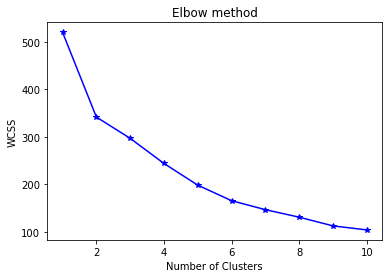

In [3]:
wcss = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(K, wcss,'b*-')
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show

#### Applying the silhouette method

In [4]:
K = range(2,11)

print("Sillhouette Method Results")
for k in K:
  kmeans_ = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df,labels_)

  print("N_cluster: {}, score: {}".format(k,coef))

Sillhouette Method Results
N_cluster: 2, score: 0.5260105170007969
N_cluster: 3, score: 0.2638619489636931
N_cluster: 4, score: 0.43293805927952383
N_cluster: 5, score: 0.23326308075205043
N_cluster: 6, score: 0.25532775029902594
N_cluster: 7, score: 0.19523291430020973
N_cluster: 8, score: 0.2422403063112023
N_cluster: 9, score: 0.21040364159400393
N_cluster: 10, score: 0.21714338297378413


#### Applying K-Means

In [5]:
# set number of clusters to 2
k = 2
# run k-means
kmeans = KMeans(n_clusters=k, random_state=0, n_init=20).fit(df)
klabels = kmeans.labels_

In [6]:
df['Cluster'] = klabels
dfn['Cluster'] = klabels
df['Neighborhood'] = dfc['Neighborhood']
df['Latitude'] = dfc['Latitude']
df['Longitude'] = dfc['Longitude']

#### Showing the clusters in a map

In [7]:
coord = [39.1014537, -84.5124602] #Cincinnati Coordenates

clustermap = folium.Map(location=coord, zoom_start=12)

for lat, long, neigh, cluster in zip(df['Latitude'], 
                                     df['Longitude'], 
                                     df['Neighborhood'], 
                                     df['Cluster']):
    label = '{}'.format(neigh)
    label = folium.Popup(label, parse_html=True)
    
    if cluster == 0:
        folium.CircleMarker([lat, long],
                            radius=5,
                            popup=label,
                            color='red',
                            fill=True,
                            fill_color='white',
                            fill_opacity=1,
                            parse_html=False).add_to(clustermap)
    if cluster == 1:
        folium.CircleMarker([lat, long],
                            radius=5,
                            popup=label,
                            color='blue',
                            fill=True,
                            fill_color='white',
                            fill_opacity=1,
                            parse_html=False).add_to(clustermap)

In [8]:
clustermap

#### Analyzing the results

In [9]:
cluster_0 = dfn[dfn['Cluster']==0].drop(columns = ['Unnamed: 0', 'Cluster'])

In [10]:
cluster_1 = dfn[dfn['Cluster']==1].drop(columns = ['Unnamed: 0', 'Cluster'])

Text(0.5, 1.0, 'Cluster 0')

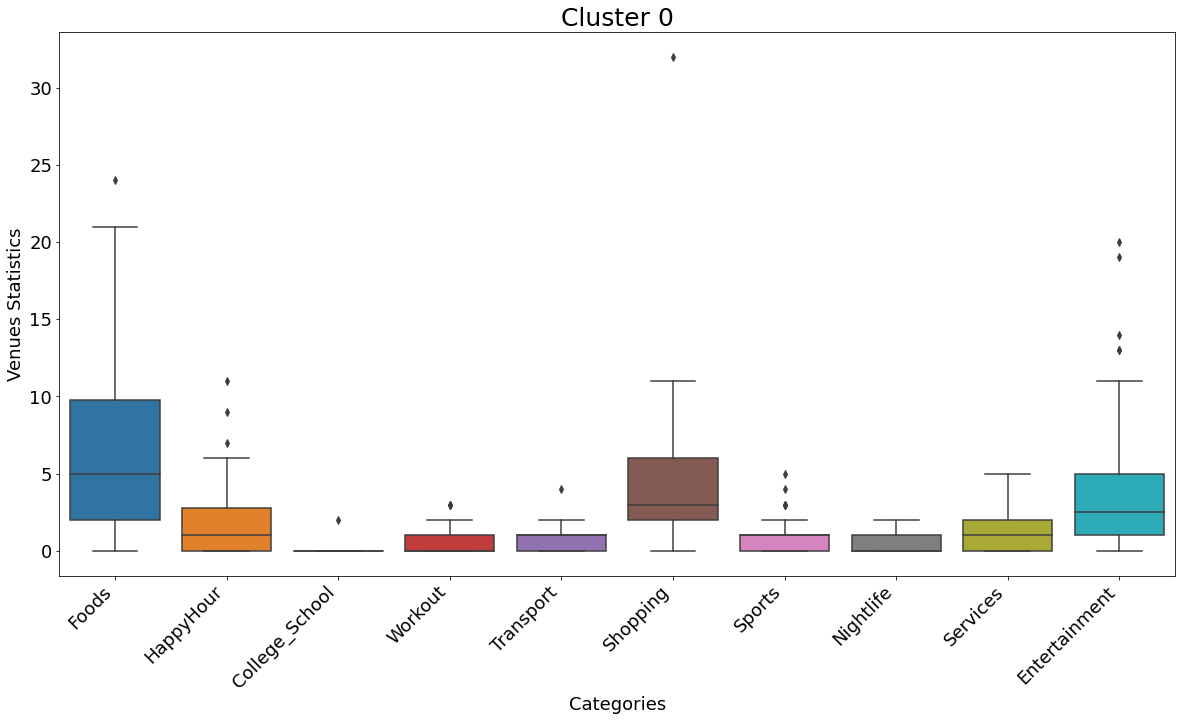

In [11]:
plt.figure(figsize=(20, 10))

ax = sns.boxplot(data=cluster_0)
ax.set_ylabel('Venues Statistics', fontsize=18)
ax.set_xlabel('Categories', fontsize=18)
ax.tick_params(labelsize=18)

plt.xticks(rotation=45, ha='right')
ax.set_title('Cluster 0', fontsize=25)

Text(0.5, 1.0, 'Cluster 1')

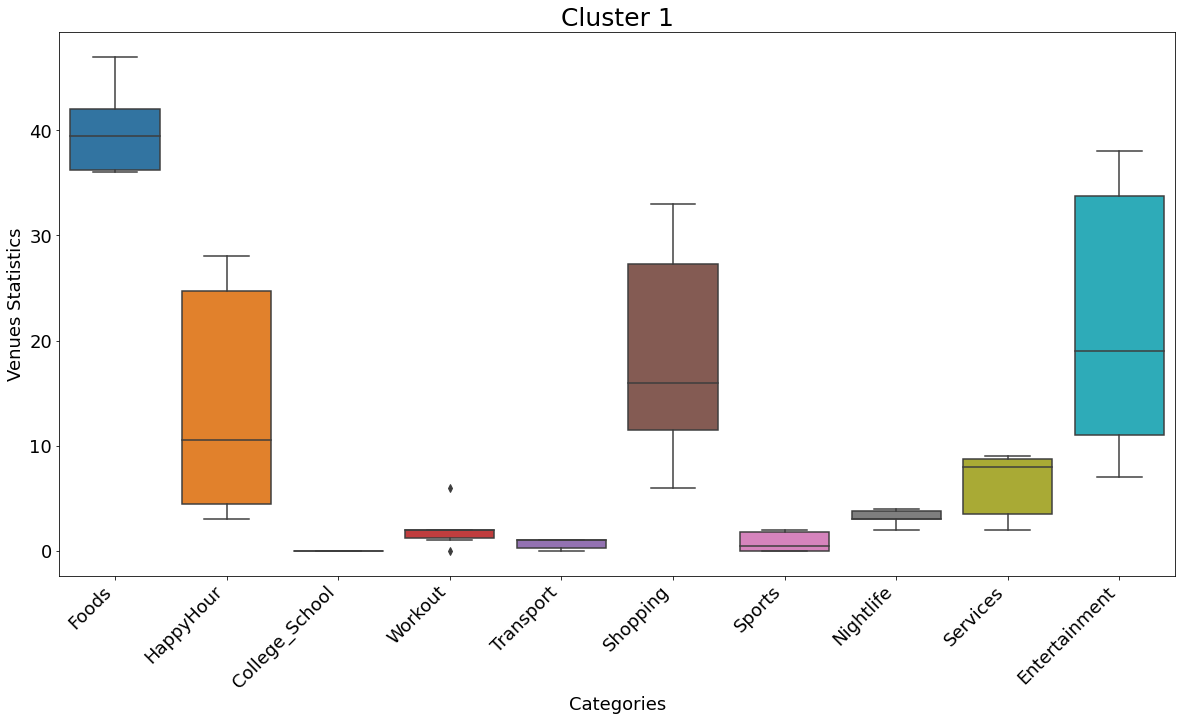

In [12]:
plt.figure(figsize=(20, 10))

ax = sns.boxplot(data=cluster_1)
ax.set_ylabel('Venues Statistics', fontsize=18)
ax.set_xlabel('Categories', fontsize=18)
ax.tick_params(labelsize=18)

plt.xticks(rotation=45, ha='right')
ax.set_title('Cluster 1', fontsize=25)

In [13]:
([df.Neighborhood[df['Cluster'] == 0]])

[0                      Avondale
 1                     Bond Hill
 2                           CUF
 3                    California
 4               Camp Washington
 5                      Carthage
 6                       Clifton
 7                  College Hill
 8             Columbia-Tusculum
 11                     East End
 12              East Price Hill
 13            East Walnut Hills
 14                East Westwood
 15                English Woods
 16                     Evanston
 17                     Hartwell
 19              Kennedy Heights
 20                      Linwood
 21             Lower Price Hill
 22                 Madisonville
 23                     Millvale
 24                  Mount Adams
 25                   Mount Airy
 26                 Mount Auburn
 27                Mount Lookout
 28             Mount Washington
 29               North Avondale
 30              North Fairmount
 31                    Northside
 34                Paddock Hills
 36       

In [14]:
([df.Neighborhood[df['Cluster'] == 1]])

[9         Corryville
 10          Downtown
 18         Hyde Park
 32            Oakley
 33    Over-the-Rhine
 35         Pendleton
 Name: Neighborhood, dtype: object]